### Prof. Pedram Jahangiry


![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_Learning-USU/blob/main/Lectures%20and%20codes/Module%206-%20Deep%20Sequence%20Modeling/python/univariate_ts/Univariate%20forecasting_plots_TensorFlow_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 6: Deep Sequence Modeling (Univariate timeseries forecasting)

Can we predict stock market returns with LSTM? 

# Installation

* If you want to run your code on Google Colab, there is no installation required. (recommended for the course)
* If you want to run your code locally, then you need to install tensorflow first: https://www.tensorflow.org/install


In [1]:
import tensorflow 
tensorflow.__version__

'2.12.0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
stocks = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/yfinance.csv", index_col=0, header=[0,1])
stocks.head()

Adj Close                                                 \
                 AAPL         GLD       MSFT         QQQ         SPY   
Date                                                                   
2018-01-02  40.950497  125.150002  80.940392  153.123489  246.766678   
2018-01-03  40.943367  124.820000  81.317093  154.611298  248.327499   
2018-01-04  41.133541  125.459999  82.032768  154.881836  249.374115   
2018-01-05  41.601864  125.330002  83.049835  156.437332  251.035934   
2018-01-08  41.447350  125.309998  83.134598  157.045990  251.495041   

                                      Close                         ...  \
                 TSLA        USO       AAPL         GLD       MSFT  ...   
Date                                                                ...   
2018-01-02  21.368668  96.559998  43.064999  125.150002  85.949997  ...   
2018-01-03  21.150000  98.720001  43.057499  124.820000  86.349998  ...   
2018-01-04  20.974667  98.959999  43.257500  125.459999  87.110001  ...   
2018-01-05  21.105333  98.480003  43.750000  125.330002  88.190002  ...   
2018-01-08  22.427334  99.040001  43.587502  125.309998  88.279999  ...   

                  Open                           Volume                      \
                   SPY       TSLA        USO       AAPL       GLD      MSFT   
Date                                                                          
2018-01-02  267.839996  20.799999  96.559998  102223600  11762500  22483800   
2018-01-03  268.959991  21.400000  97.360001  118071600   7904300  26061400   
2018-01-04  271.200012  20.858000  98.639999   89738400   7329700  21912000   
2018-01-05  272.510010  21.108000  98.239998   94640000   5739900  23407100   
2018-01-08  273.309998  21.066668  98.480003   82271200   3566700  22113000   

                                                    
                 QQQ       SPY       TSLA      USO  
Date                                                
2018-01-02  32573300  86655700   65283000  1497588  
2018-01-03  29383600  90070400   67822500  2156150  
2018-01-04  24776100  80636400  149194500  1480988  
2018-01-05  26992300  83524000   68868000  1609888  
2018-01-08  23159100  57319200  147891000  1229225  

[5 rows x 42 columns]

In [4]:
stocks.index = pd.to_datetime(stocks.index).to_period('B')
stocks.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
             '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', name='Date', length=1259)

In [5]:
df = stocks['Close'][['AAPL']]
df.head()

,AAPL
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


In [6]:
idx = pd.period_range(min(df.index), max(df.index))
df = df.reindex(idx, fill_value=np.nan)
df = df.fillna(method = 'ffill')
df.tail(10)


,AAPL
2022-12-19,132.369995
2022-12-20,132.300003
2022-12-21,135.449997
2022-12-22,132.229996
2022-12-23,131.860001
2022-12-26,131.860001
2022-12-27,130.029999
2022-12-28,126.040001
2022-12-29,129.610001
2022-12-30,129.929993


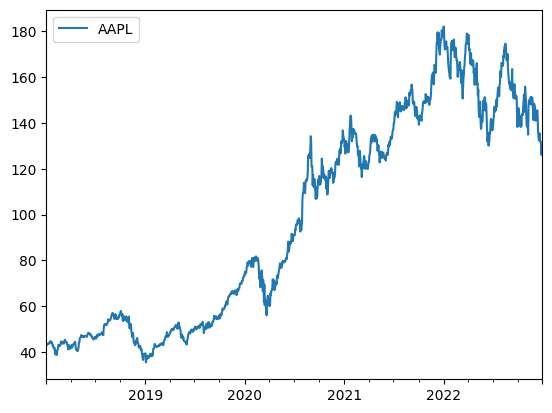

In [7]:
df.plot()
plt.show()

# Preparing the data

## Stationarity



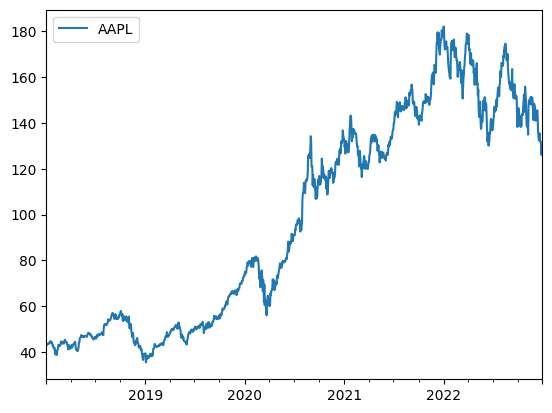

In [8]:
df.plot()
plt.show()

In [9]:
# the data is clearly not stationary. We will go ahead and use the log returns
df['LogAAPL']= np.log(df['AAPL'])
df['DiffLogAAPL']= df['LogAAPL'].diff(1)

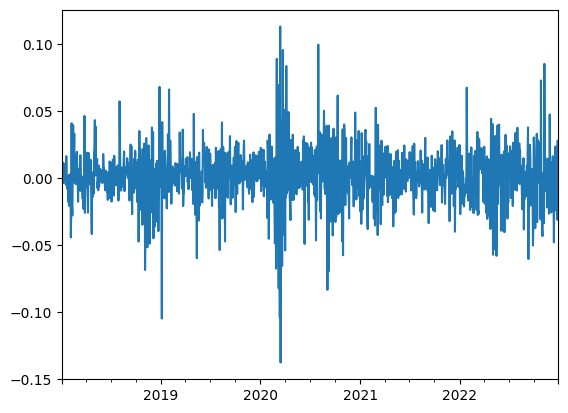

In [10]:
df['DiffLogAAPL'].plot()
plt.show()

In [11]:
df.dropna(inplace=True)

In [12]:
df.head()

,AAPL,LogAAPL,DiffLogAAPL
2018-01-03,43.057499,3.762536,-0.000174
2018-01-04,43.257500,3.767171,0.004634
2018-01-05,43.750000,3.778492,0.011321
2018-01-08,43.587502,3.774770,-0.003721
2018-01-09,43.582500,3.774656,-0.000115


# Predictions
https://www.tensorflow.org/tutorials/structured_data/time_series

In this section, we are going to make predictions for AAPL stock price (not the log returns).

In [13]:
df.drop(['LogAAPL', 'DiffLogAAPL'], axis=1, inplace=True)

<Axes: >

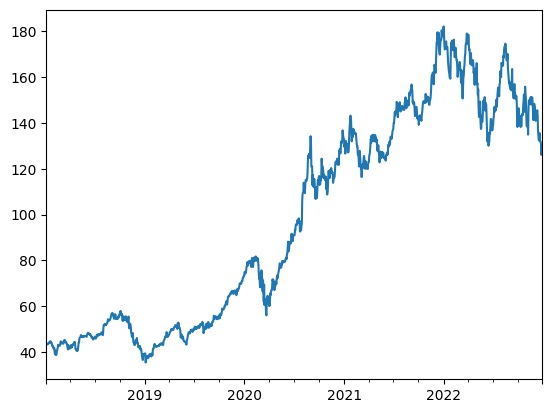

In [14]:
df['AAPL'].plot()

## Splitting the data
we will use (70%, 20%, 10%) split for the training, validation, and test sets. Note the data is not being randomly shuffled before splitting. It ensures that chopping the data into windows of consecutive samples is still possible.


In [18]:
column_indices = {name: i for i, name in enumerate(df_norm.columns)}

n = len(df_norm)
train_df = df_norm[0:int(n*0.7)]
val_df = df_norm[int(n*0.7):int(n*0.9)]
test_df = df_norm[int(n*0.9):]

num_features = df_norm.shape[1]

In [19]:
column_indices

{'AAPL': 0}

## Normalizing the data
1. The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.
2. It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. 

In [20]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

## Data windowing

The main features of the input windows are:

1. The width (number of time steps) of the input and label windows.
2. The time offset between them.
3. Which features are used as inputs, labels, or both.

We use RNN models for:
* Single-output, and multi-output predictions.
* Single-time-step and multi-time-step predictions.

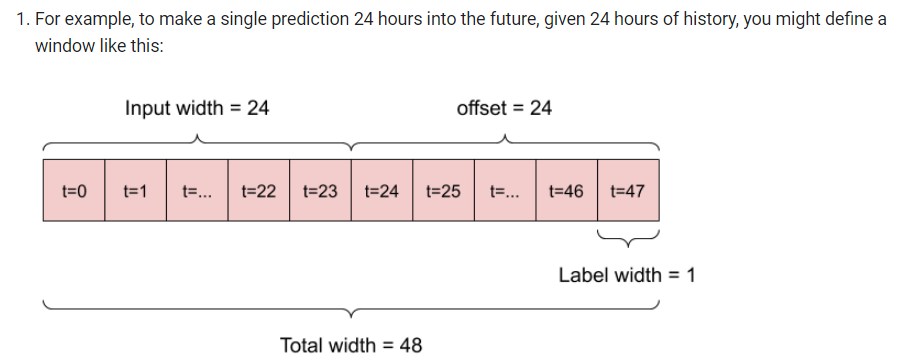

### WindowGenerator class

This class can:

1. Handle the indexes and offsets as shown in the diagrams above.
2. Split windows of features into (features, labels) pairs.
3. Plot the content of the resulting windows.
4. Efficiently generate batches of these windows from the training, evaluation, and test data, using tf.data.Datasets.

In [21]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [22]:
w1 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['AAPL'])
w1

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['AAPL']

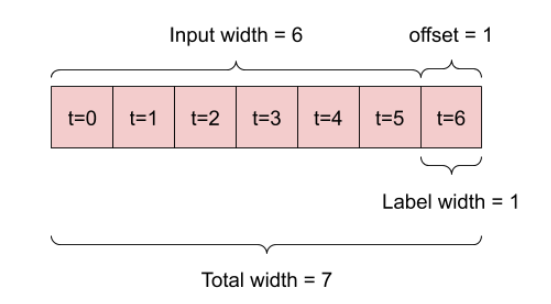

### Split window function

Given a list of consecutive inputs, the split_window method will convert them to a window of inputs and a window of labels.
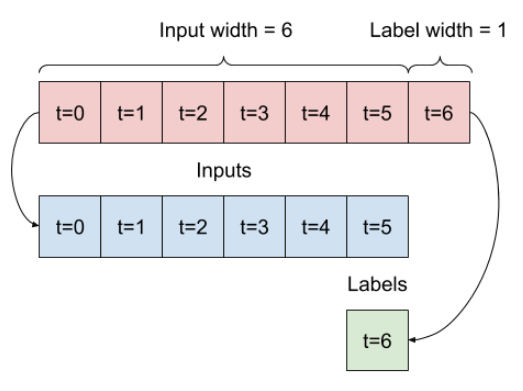


In [23]:
import tensorflow as tf
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window 
# Python classes are mutable, and methods in a class are just attributes like any other. So you can add, remove, or modify them. 
# Here you define a function split_window and then assign it to the split_window attribute of the WindowGenerator class. This effectively "adds" the method to the class.

In [24]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 1)
Inputs shape: (3, 6, 1)
Labels shape: (3, 1, 1)


In [25]:
example_window

<tf.Tensor: shape=(3, 7, 1), dtype=float64, numpy=
array([[[-0.94555077],
        [-0.93945021],
        [-0.92442763],
        [-0.92938427],
        [-0.92953681],
        [-0.92984191],
        [-0.92229245]],

       [[-0.82254867],
        [-0.82415011],
        [-0.82087101],
        [-0.82087101],
        [-0.82605653],
        [-0.82910675],
        [-0.83391096]],

       [[-0.60902991],
        [-0.62359497],
        [-0.5651823 ],
        [-0.60140424],
        [-0.56487733],
        [-0.57219791],
        [-0.61162261]]])>

In [26]:
example_inputs

<tf.Tensor: shape=(3, 6, 1), dtype=float64, numpy=
array([[[-0.94555077],
        [-0.93945021],
        [-0.92442763],
        [-0.92938427],
        [-0.92953681],
        [-0.92984191]],

       [[-0.82254867],
        [-0.82415011],
        [-0.82087101],
        [-0.82087101],
        [-0.82605653],
        [-0.82910675]],

       [[-0.60902991],
        [-0.62359497],
        [-0.5651823 ],
        [-0.60140424],
        [-0.56487733],
        [-0.57219791]]])>

In [27]:
example_labels

<tf.Tensor: shape=(3, 1, 1), dtype=float64, numpy=
array([[[-0.92229245]],

       [[-0.83391096]],

       [[-0.61162261]]])>

### Plotting function

In [28]:
w1

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['AAPL']

In [29]:
w1.example = example_inputs, example_labels
# The line w1.example = example_inputs, example_labels is storing the example inputs and labels as an attribute of the w1 instance of the WindowGenerator class.
# In Python, you can dynamically add attributes to instances of a class. Here, the attribute example is being created for the w1 object and is being assigned the tuple (example_inputs, example_labels).
# This way, you can access these example inputs and labels later in your code by referencing w1.example. It will return the tuple (example_inputs, example_labels).

In [30]:
w1.example

(<tf.Tensor: shape=(3, 6, 1), dtype=float64, numpy=
 array([[[-0.94555077],
         [-0.93945021],
         [-0.92442763],
         [-0.92938427],
         [-0.92953681],
         [-0.92984191]],
 
        [[-0.82254867],
         [-0.82415011],
         [-0.82087101],
         [-0.82087101],
         [-0.82605653],
         [-0.82910675]],
 
        [[-0.60902991],
         [-0.62359497],
         [-0.5651823 ],
         [-0.60140424],
         [-0.56487733],
         [-0.57219791]]])>,
 <tf.Tensor: shape=(3, 1, 1), dtype=float64, numpy=
 array([[[-0.92229245]],
 
        [[-0.83391096]],
 
        [[-0.61162261]]])>)

In [31]:
def plot(self, model=None, plot_col='AAPL', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Day')

WindowGenerator.plot = plot
# This plot aligns inputs, labels, and (later) predictions based on the time that the item refers to:



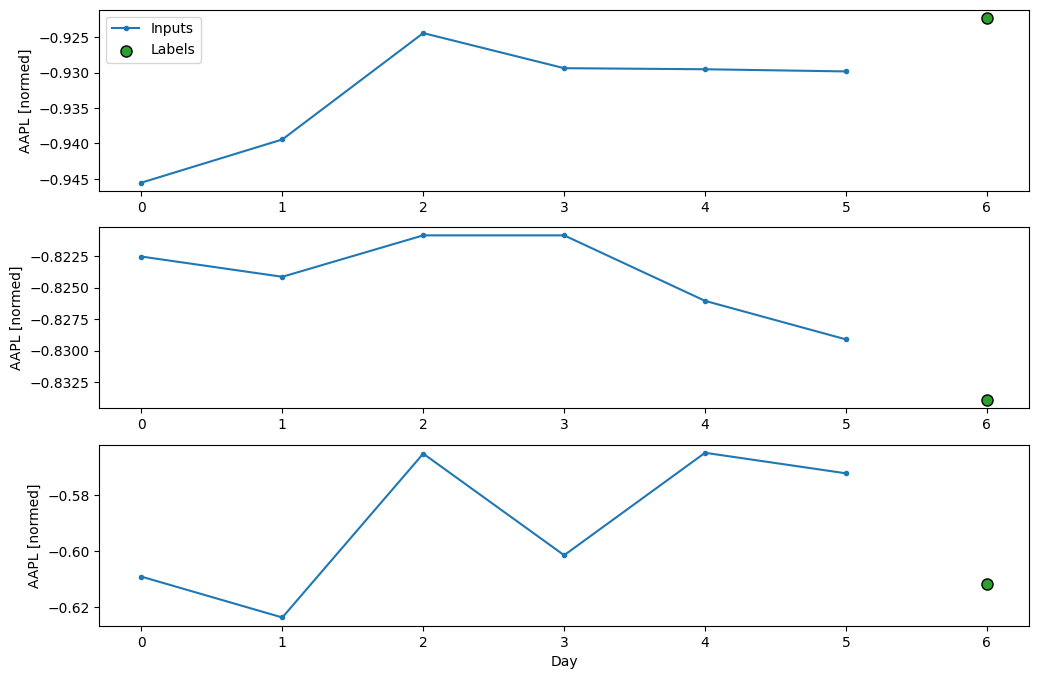

In [32]:
w1.plot()

### Creating datasetd (tf.data.Datasets)

In [33]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [34]:
# Add properties for accessing them as tf.data.Datasets using the make_dataset method you defined earlier. 
# Also, add a standard example batch for easy access and plotting:

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example



Now, the WindowGenerator object gives you access to the tf.data.Dataset objects, so you can easily iterate over the data.

In [35]:
w1.train.element_spec


(TensorSpec(shape=(None, 6, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [36]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 1)
Labels shape (batch, time, features): (32, 1, 1)


## One-Step Forecast

### Baseline
Tomorrow's forecast = today's price

In [37]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['AAPL'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['AAPL']

In [38]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [39]:
column_indices

{'AAPL': 0}

In [40]:
baseline = Baseline(label_index=column_indices['AAPL']) # We are selecting the 'AAPL' feature for making the baseline prediction.

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

9/9 [==============================] - 0s 3ms/step - loss: 0.0078 - mean_absolute_error: 0.0661


In [41]:
val_performance

{'Baseline': [0.007798064034432173, 0.06608127802610397]}

In [42]:
performance

{'Baseline': [0.009840819053351879, 0.07421068847179413]}

The WindowGenerator has a plot method, but the plots won't be very interesting with only a single sample.

So, create a wider WindowGenerator that generates windows 60 days of consecutive inputs and labels at a time.

In [43]:
wide_window = WindowGenerator(
    input_width=60, label_width=60, shift=1, # for the baseline model, 1 means we are using yesterday's price as today's forecast.
    label_columns=['AAPL'])

wide_window

Total window size: 61
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]
Label column name(s): ['AAPL']

In [44]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 60, 1)
Output shape: (32, 60, 1)


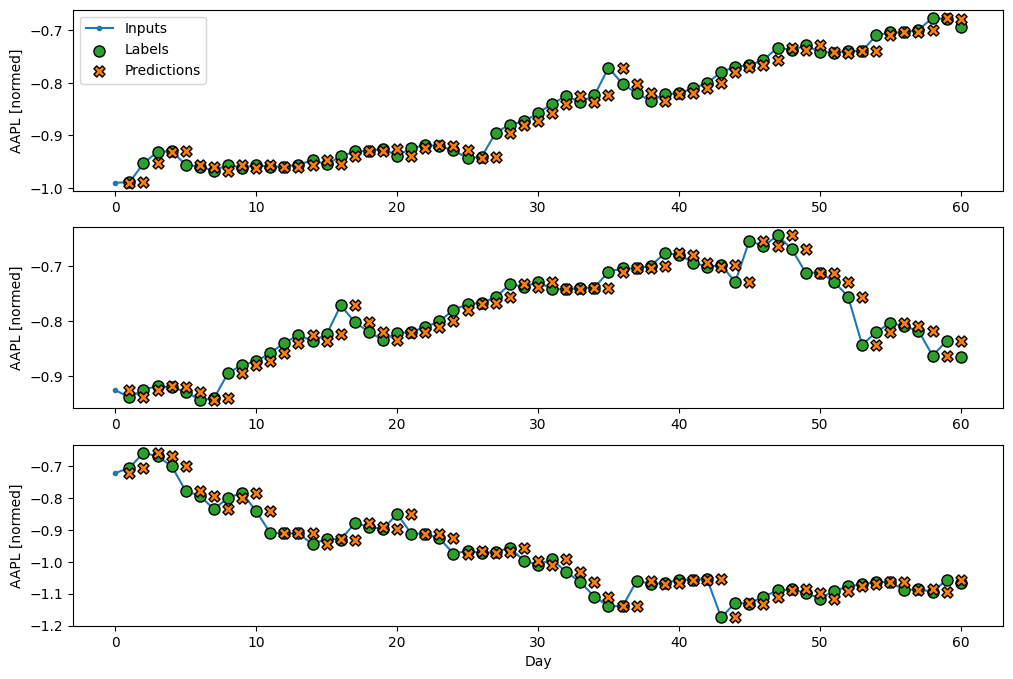

In [45]:
wide_window.plot(baseline)


### RNN models

In [46]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [47]:
conv_window = WindowGenerator(
    input_width=60,
    label_width=1,
    shift=1,
    label_columns=['AAPL'])

conv_window

Total window size: 61
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Label indices: [60]
Label column name(s): ['AAPL']

In [48]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [49]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 60, 1)
Output shape: (32, 1, 1)


In [50]:
history = compile_and_fit(multi_step_dense, conv_window)

val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/50
27/27 [==============================] - 3s 11ms/step - loss: 0.3253 - mean_absolute_error: 0.3673 - val_loss: 0.3832 - val_mean_absolute_error: 0.4969
Epoch 2/50
27/27 [==============================] - 0s 8ms/step - loss: 0.0457 - mean_absolute_error: 0.1487 - val_loss: 0.1718 - val_mean_absolute_error: 0.3438
Epoch 3/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0260 - mean_absolute_error: 0.1100 - val_loss: 0.1099 - val_mean_absolute_error: 0.2765
Epoch 4/50
27/27 [==============================] - 0s 8ms/step - loss: 0.0204 - mean_absolute_error: 0.0949 - val_loss: 0.0913 - val_mean_absolute_error: 0.2531
Epoch 5/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0852 - val_loss: 0.0546 - val_mean_absolute_error: 0.1930
Epoch 6/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0771 - val_loss: 0.0566 - val_mean_absolute_error: 0.1941
Epoch 7/50
7/7 [===========

In [51]:
val_performance

{'Baseline': [0.007798064034432173, 0.06608127802610397],
 'Multi step dense': [0.06709405779838562, 0.20610012114048004]}

In [52]:
performance

{'Baseline': [0.009840819053351879, 0.07421068847179413],
 'Multi step dense': [0.0827614963054657, 0.25137436389923096]}

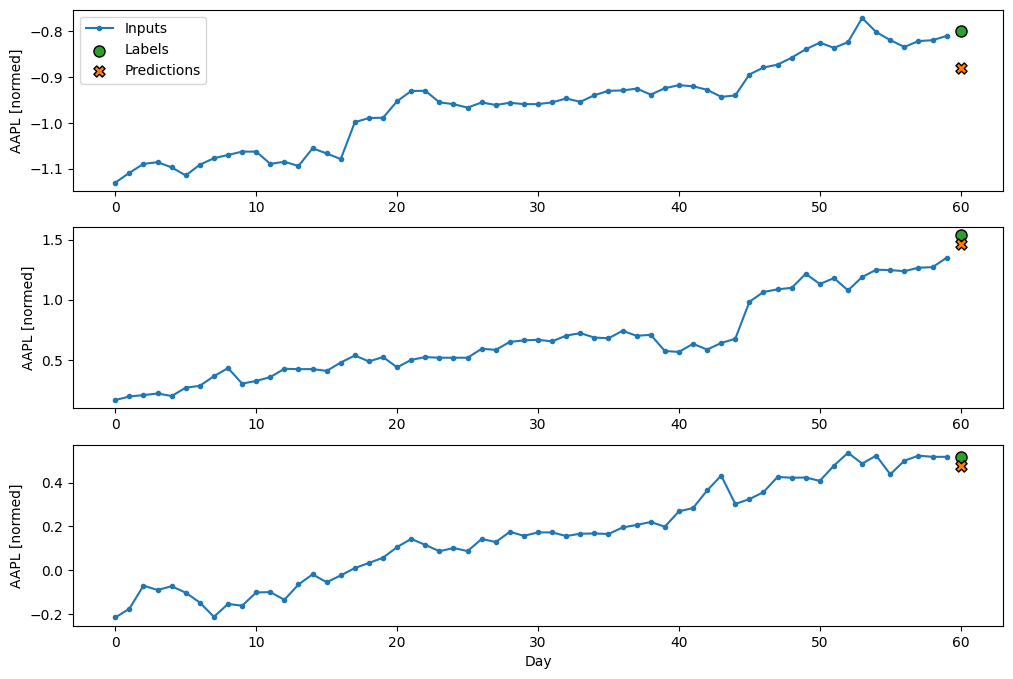

In [53]:
conv_window.plot(multi_step_dense)


In [54]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(60,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [55]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 60, 1)
Output shape: (32, 1, 1)


In [56]:
history = compile_and_fit(conv_model, conv_window)

val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/50
27/27 [==============================] - 6s 19ms/step - loss: 0.2087 - mean_absolute_error: 0.3285 - val_loss: 0.2857 - val_mean_absolute_error: 0.4537
Epoch 2/50
27/27 [==============================] - 0s 8ms/step - loss: 0.0382 - mean_absolute_error: 0.1425 - val_loss: 0.1710 - val_mean_absolute_error: 0.3440
Epoch 3/50
27/27 [==============================] - 0s 8ms/step - loss: 0.0266 - mean_absolute_error: 0.1099 - val_loss: 0.1082 - val_mean_absolute_error: 0.2687
Epoch 4/50
27/27 [==============================] - 0s 9ms/step - loss: 0.0201 - mean_absolute_error: 0.0942 - val_loss: 0.0868 - val_mean_absolute_error: 0.2402
Epoch 5/50
27/27 [==============================] - 0s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0842 - val_loss: 0.0564 - val_mean_absolute_error: 0.1928
Epoch 6/50
27/27 [==============================] - 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0785 - val_loss: 0.0654 - val_mean_absolute_error: 0.2051
Epoch 7/50
27/27 [=========

In [57]:
performance

{'Baseline': [0.009840819053351879, 0.07421068847179413],
 'Multi step dense': [0.0827614963054657, 0.25137436389923096],
 'Conv': [0.0219299104064703, 0.12294058501720428]}

In [58]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 60, 1)
Labels shape: (32, 60, 1)
Output shape: (32, 1, 1)


In [59]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [60]:
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 60, 1)
Labels shape: (32, 60, 1)
Output shape: (32, 60, 1)


In [61]:
history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/50
27/27 [==============================] - 4s 27ms/step - loss: 0.4657 - mean_absolute_error: 0.5592 - val_loss: 1.7297 - val_mean_absolute_error: 1.2518
Epoch 2/50
27/27 [==============================] - 0s 11ms/step - loss: 0.0618 - mean_absolute_error: 0.1672 - val_loss: 0.9830 - val_mean_absolute_error: 0.8903
Epoch 3/50
27/27 [==============================] - 0s 15ms/step - loss: 0.0466 - mean_absolute_error: 0.1287 - val_loss: 0.9313 - val_mean_absolute_error: 0.8668
Epoch 4/50
27/27 [==============================] - 0s 12ms/step - loss: 0.0415 - mean_absolute_error: 0.1191 - val_loss: 0.8055 - val_mean_absolute_error: 0.7943
Epoch 5/50
27/27 [==============================] - 0s 11ms/step - loss: 0.0373 - mean_absolute_error: 0.1082 - val_loss: 0.6950 - val_mean_absolute_error: 0.7264
Epoch 6/50
27/27 [==============================] - 0s 11ms/step - loss: 0.0335 - mean_absolute_error: 0.1001 - val_loss: 0.5878 - val_mean_absolute_error: 0.6544
Epoch 7/50
27/27 [====

In [62]:
performance


{'Baseline': [0.009840819053351879, 0.07421068847179413],
 'Multi step dense': [0.0827614963054657, 0.25137436389923096],
 'Conv': [0.0219299104064703, 0.12294058501720428],
 'LSTM': [0.031368352472782135, 0.1224115788936615]}

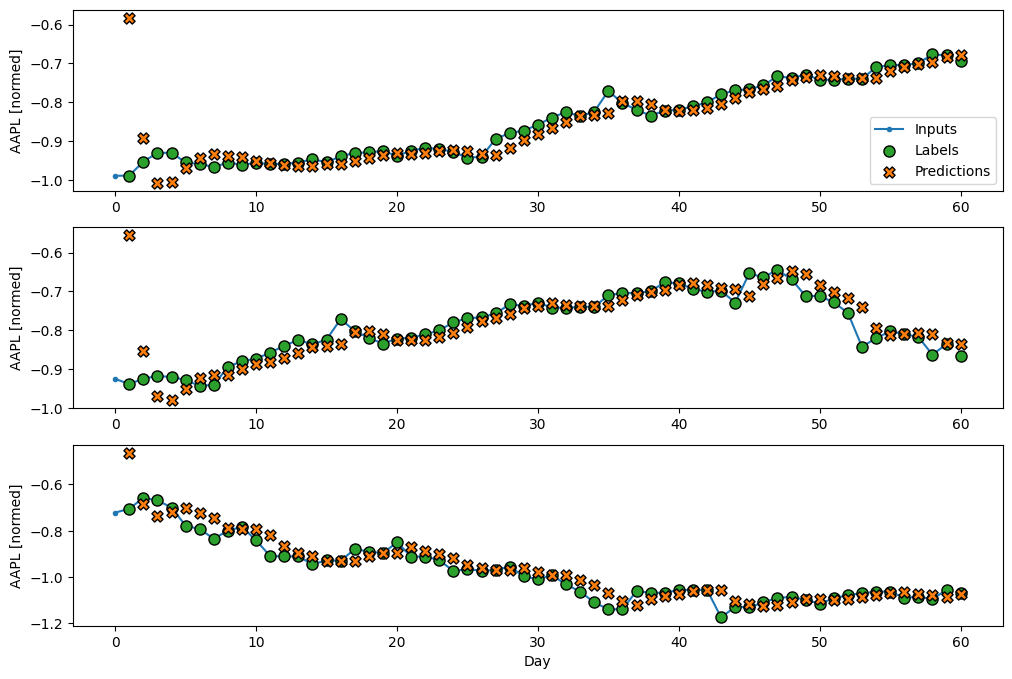

In [63]:
wide_window.plot(lstm_model)

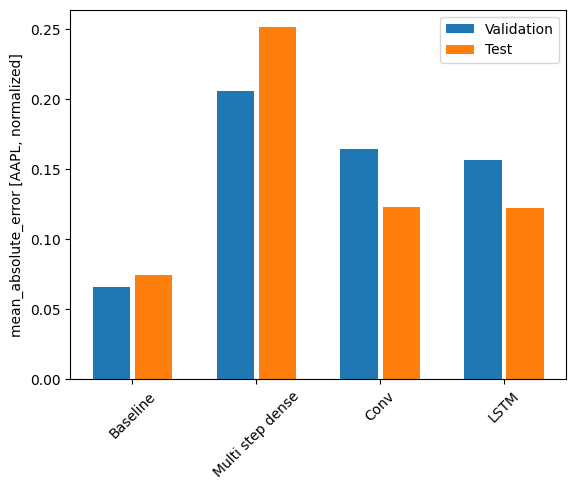

In [64]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [AAPL, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

## Multi-Step Forecast

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

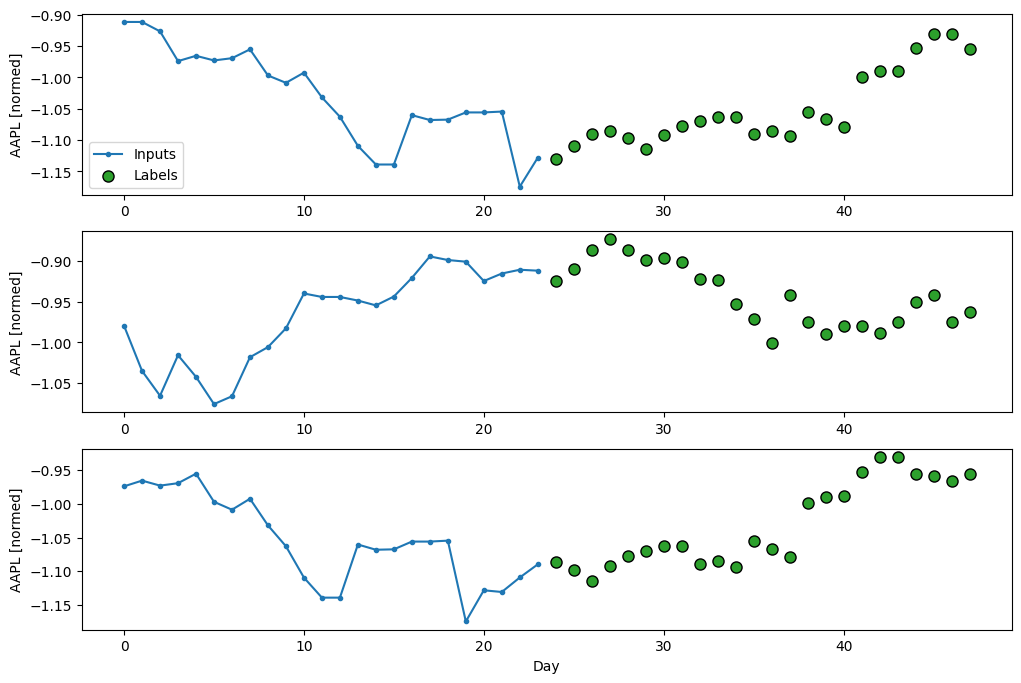

In [65]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

### Baseline

7/7 [==============================] - 0s 3ms/step - loss: 0.0854 - mean_absolute_error: 0.2293


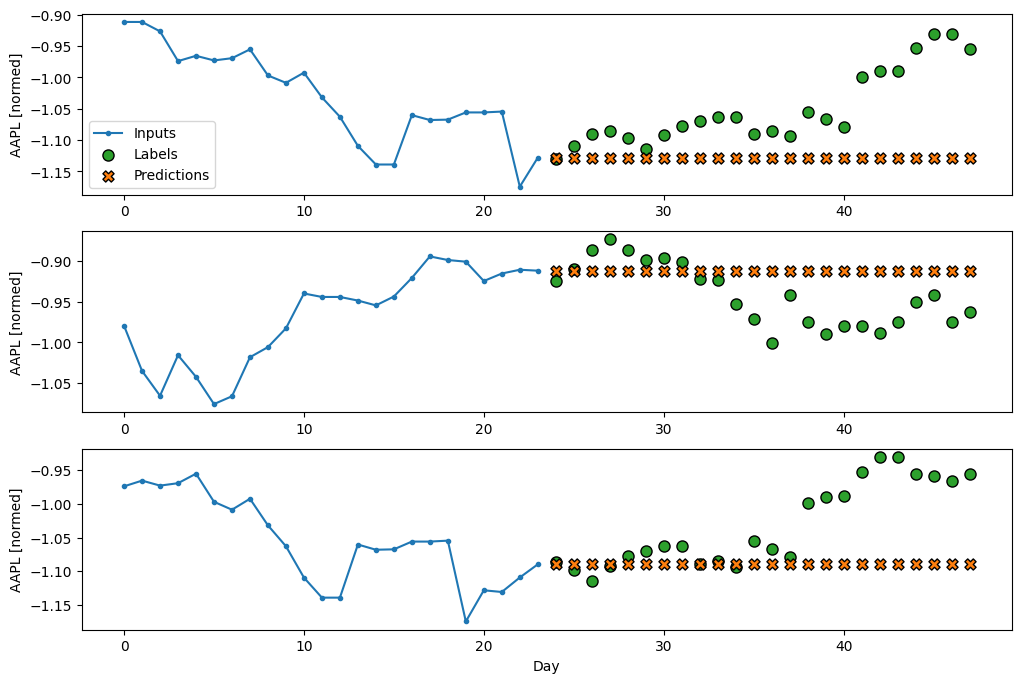

In [67]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

### RNN

Epoch 1/50
28/28 [==============================] - 7s 84ms/step - loss: 0.8210 - mean_absolute_error: 0.7857 - val_loss: 4.4021 - val_mean_absolute_error: 2.0651
Epoch 2/50
28/28 [==============================] - 0s 9ms/step - loss: 0.2585 - mean_absolute_error: 0.4343 - val_loss: 1.6183 - val_mean_absolute_error: 1.2167
Epoch 3/50
28/28 [==============================] - 0s 9ms/step - loss: 0.0900 - mean_absolute_error: 0.2455 - val_loss: 1.1914 - val_mean_absolute_error: 1.0274
Epoch 4/50
28/28 [==============================] - 0s 9ms/step - loss: 0.0545 - mean_absolute_error: 0.1893 - val_loss: 1.0366 - val_mean_absolute_error: 0.9495
Epoch 5/50
28/28 [==============================] - 0s 9ms/step - loss: 0.0367 - mean_absolute_error: 0.1505 - val_loss: 0.9953 - val_mean_absolute_error: 0.9278
Epoch 6/50
28/28 [==============================] - 0s 9ms/step - loss: 0.0311 - mean_absolute_error: 0.1339 - val_loss: 0.9253 - val_mean_absolute_error: 0.8891
Epoch 7/50
28/28 [=========

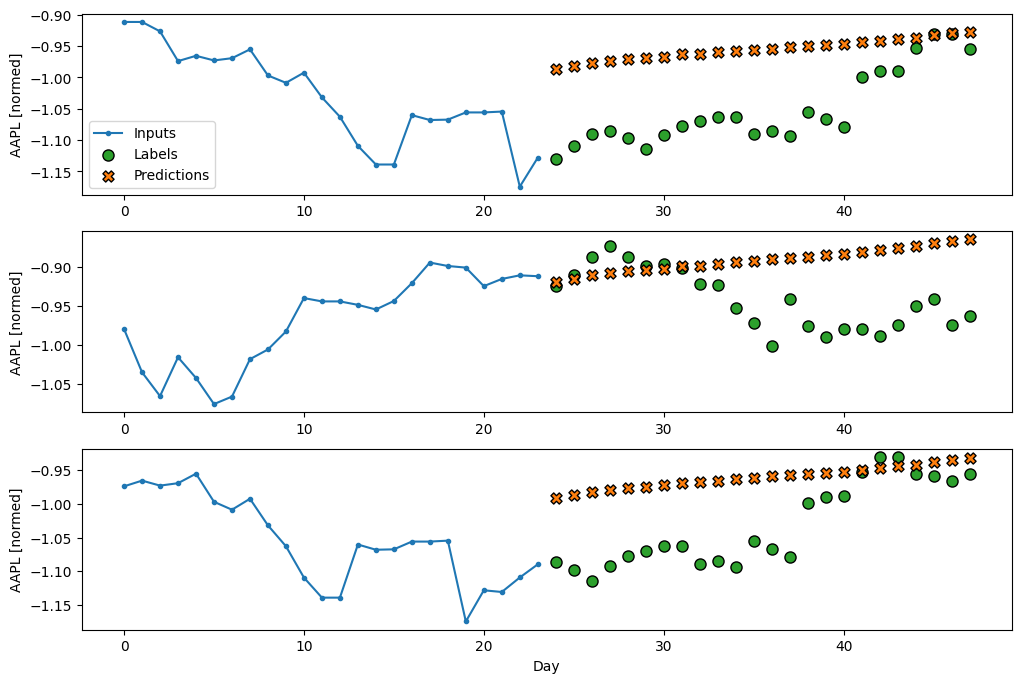

In [70]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)


multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

## AutoRegressive

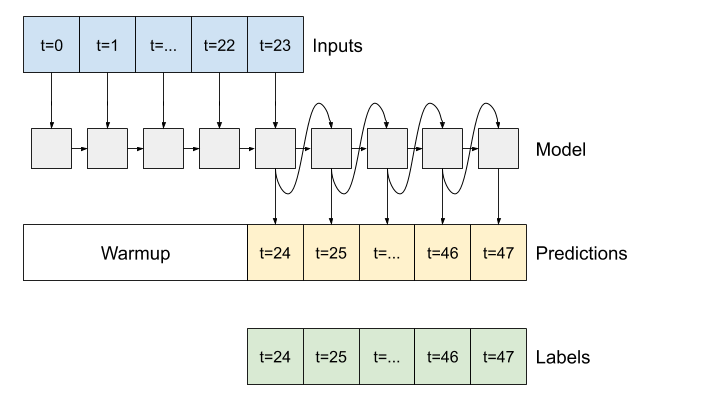

In [71]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [72]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [73]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [74]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 1])

In [75]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [76]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 1)


Epoch 1/50
28/28 [==============================] - 8s 79ms/step - loss: 0.4259 - mean_absolute_error: 0.5163 - val_loss: 0.6796 - val_mean_absolute_error: 0.7372
Epoch 2/50
28/28 [==============================] - 3s 105ms/step - loss: 0.0768 - mean_absolute_error: 0.2124 - val_loss: 1.0700 - val_mean_absolute_error: 0.9662
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 0.9748 - mean_absolute_error: 0.9169


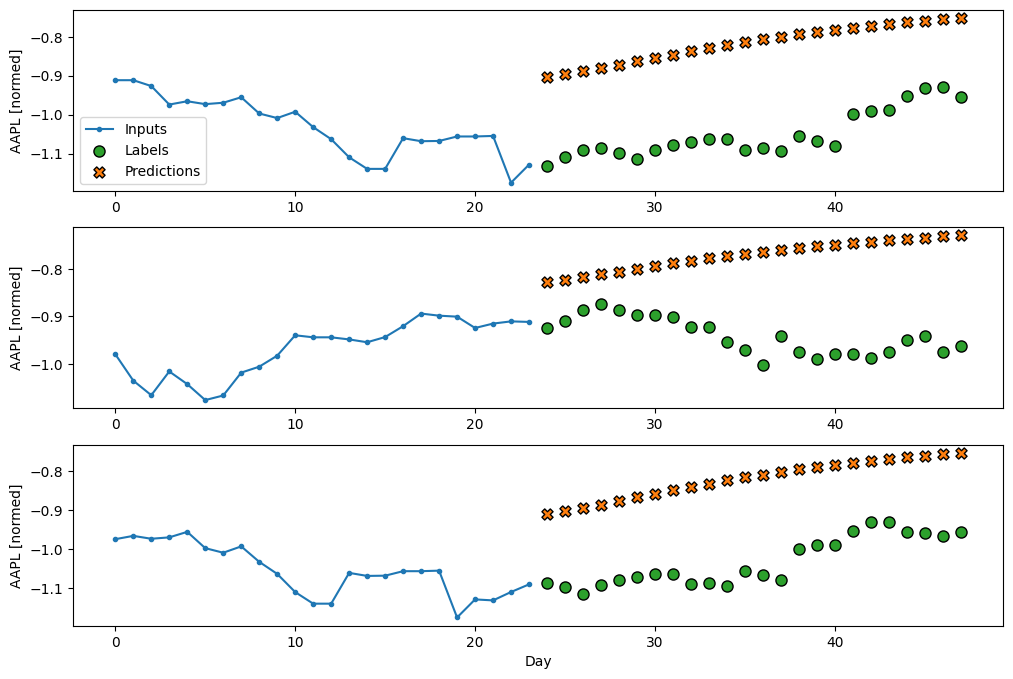

In [78]:
history = compile_and_fit(feedback_model, multi_window)


multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

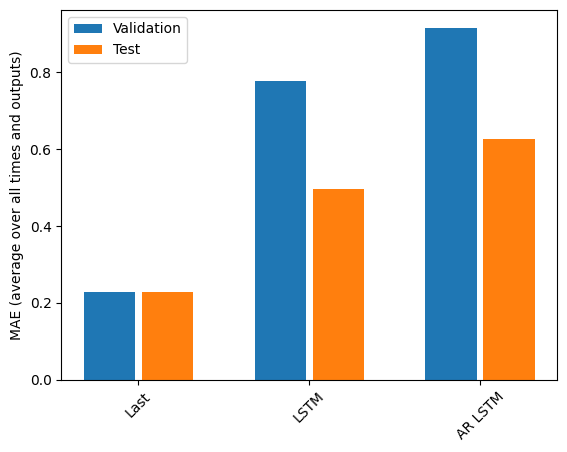

In [79]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()